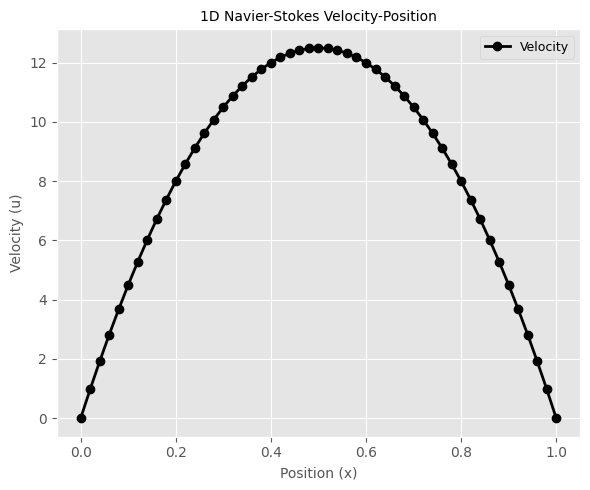

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
number_of_elements = 50  # number of elements
L = 1  # length of domain
nu = 0.01  # viscosity
f = 1.0  # force
u0 = 0  # BC at x=0
uL = 0  # BC at x=L
dx = L / number_of_elements  # size of each element

# Initialize matrices
K = np.zeros((number_of_elements+1, number_of_elements+1))
F = np.zeros(number_of_elements+1)

# Assembly
for i in range(number_of_elements):
    k_local = np.array(
        [
            [nu/dx - 0.5*(u0 + uL)/2, -nu/dx + 0.5*(u0 + uL)/2],
            [-nu/dx - 0.5*(u0 + uL)/2, nu/dx + 0.5*(u0 + uL)/2],
        ],
    )
    # Local load vector
    f_local = np.array([f*dx/2, f*dx/2])
    
    # Assembly to global matrix
    K[i:i+2, i:i+2] += k_local
    F[i:i+2] += f_local

# Apply Dirichlet boundary conditions
K[0, :] = 0
K[:, 0] = 0
K[0, 0] = 1
F[0] = u0

K[-1, :] = 0
K[:, -1] = 0
K[-1, -1] = 1
F[-1] = uL

# Solve
u = np.linalg.solve(K, F)
x = np.linspace(0, L, number_of_elements+1)

# Plot
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(x, u, '-o', label="Velocity", linewidth=2, markersize=6, color="k")
ax.set_xlabel("Position (x)", fontsize=10)
ax.set_ylabel("Velocity (u)", fontsize=10)
ax.set_title("1D Navier-Stokes Velocity-Position", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid(True)
ax.legend(fontsize=9)
plt.tight_layout()
plt.show()
